# Pranov Suresh's submission for Econ 442A Assignment Week 1

## Question 2

In [1]:
#importing essential packages and modules
import wooldridge as woo
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#defining main variable baby weight dataset
babywt = woo.data("bwght")
print ("The number of women in the study is", len(babywt))

The number of women in the study is 1388


In [3]:
#Defining a variable of family income
income = babywt["faminc"]

#Defining a condition of families with income greater than $50,000
income50 = (income>50)
#Defining a condition of women who smoked in such families
smoke50 = (income>50) & (babywt["cigs"]>0)
print("The proportion of women who had a family income higher than $50,000 and smoked is:", smoke50.sum()/income50.sum())
#Defining a condition of families with income lower than $20,000
income20 = (income<20)
#Defining a condition of women who smoked in such families
smoke20 = (income<20) & (babywt["cigs"]>0)
print("The proportion of women who had a family income lower than $20,000 and smoked is:", smoke20.sum()/income20.sum())

The proportion of women who had a family income higher than $50,000 and smoked is: 0.046875
The proportion of women who had a family income lower than $20,000 and smoked is: 0.22433460076045628


In [4]:
#Generating a summary statistics table for the data
print(babywt.describe())
#Printing the mean cigarette consumption by women in the study
print("The arithmetic mean of cigarette consumption observed in this study is", babywt["cigs"].mean())
#Printing a better measure of cigarette consumption
print("The median value of cigarette consumption observed in this study is", babywt["cigs"].median())
print("The modal value of cigarette consumption observed in this study is", babywt["cigs"].mode())

print("Here we see that the median and modal value of cigarette consumption among women in the study are actually 0. However, due to the influence of statistical outliers in the data, the mean reflects a much a higher 2.08.\nThis cannot be extrapolated to be representative of the 'average' woman in the study.")

            faminc       cigtax     cigprice        bwght     fatheduc  \
count  1388.000000  1388.000000  1388.000000  1388.000000  1192.000000   
mean     29.026657    19.552954   130.559006   118.699568    13.186242   
std      18.739285     7.795598    10.244485    20.353964     2.745985   
min       0.500000     2.000000   103.800003    23.000000     1.000000   
25%      14.500000    15.000000   122.800003   107.000000    12.000000   
50%      27.500000    20.000000   130.800003   120.000000    12.000000   
75%      37.500000    26.000000   137.000000   132.000000    16.000000   
max      65.000000    38.000000   152.500000   271.000000    18.000000   

          motheduc       parity         male        white         cigs  \
count  1387.000000  1388.000000  1388.000000  1388.000000  1388.000000   
mean     12.935833     1.632565     0.520893     0.784582     2.087176   
std       2.376728     0.894027     0.499743     0.411260     5.972688   
min       2.000000     1.000000     0

In [5]:
#Computing the modal value of the father's education data
print(babywt["fatheduc"].mode())
#Running tests to check for null values in the dataset
print(babywt.isnull().any())
print("\n")
print(babywt.isnull().sum())
print("\nIt is observed that there are nearly 196 null values in the father's education coloumn")

0    12.0
Name: fatheduc, dtype: float64
faminc      False
cigtax      False
cigprice    False
bwght       False
fatheduc     True
motheduc     True
parity      False
male        False
white       False
cigs        False
lbwght      False
bwghtlbs    False
packs       False
lfaminc     False
dtype: bool


faminc        0
cigtax        0
cigprice      0
bwght         0
fatheduc    196
motheduc      1
parity        0
male          0
white         0
cigs          0
lbwght        0
bwghtlbs      0
packs         0
lfaminc       0
dtype: int64

It is observed that there are nearly 196 null values in the father's education coloumn


## Question 3

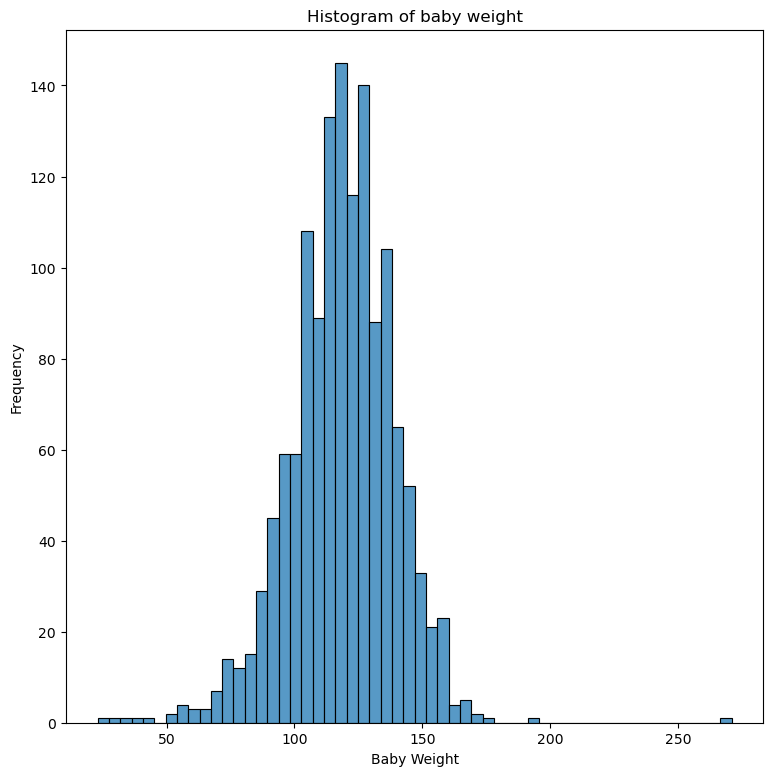

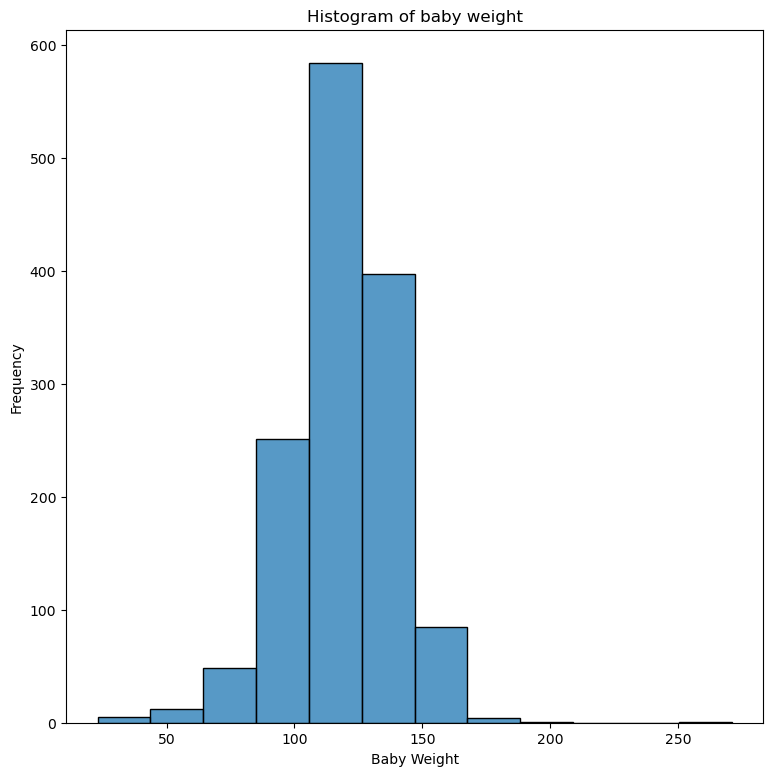

With its smaller binwidth in this scenario, it is visually apparent that the FD binned histogram is of more use.
The wider Sturges method does not allow for easy visual identification of trends and clusters. Additionally, the FD method also enables visual approximation of the nature of the distribution of the data.


In [6]:
#Plotting graphical representations of the data
#Plotting a FD Histogram of the baby weight
plt.figure(figsize= (9,9))
plt.title("Histogram of baby weight")
sns.histplot(data=babywt, x = "bwght", bins="fd")
plt.xlabel("Baby Weight")
plt.ylabel("Frequency")
plt.show()

#Plotting a Sturges Histogram of the baby weight
plt.figure(figsize= (9,9))
plt.title("Histogram of baby weight")
sns.histplot(data=babywt, x = "bwght", bins="sturges")
plt.xlabel("Baby Weight")
plt.ylabel("Frequency")
plt.show()

print("With its smaller binwidth in this scenario, it is visually apparent that the FD binned histogram is of more use.\nThe wider Sturges method does not allow for easy visual identification of trends and clusters. Additionally, the FD method also enables visual approximation of the nature of the distribution of the data.")

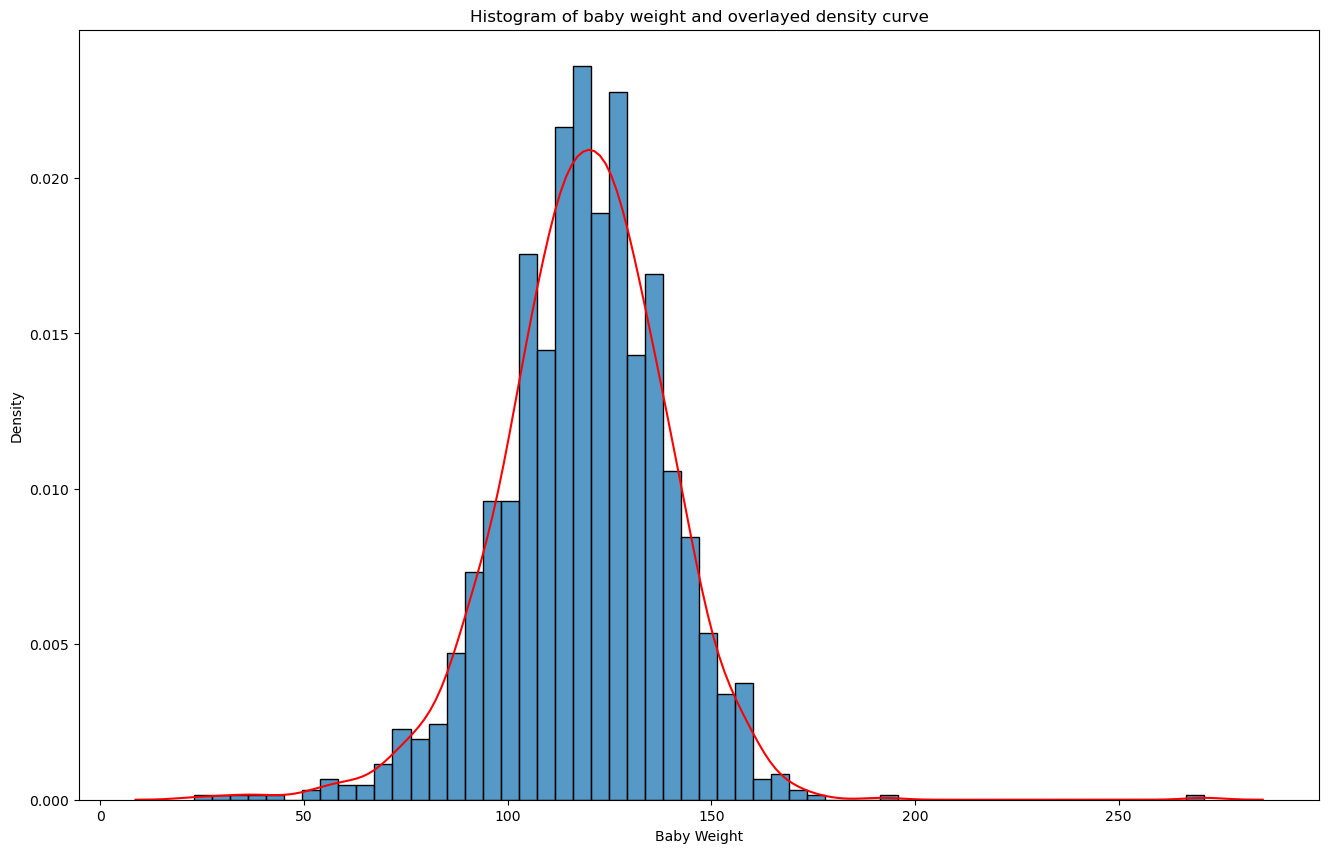

In [7]:
#Plotting the combined histogram and density curve
plt.figure(figsize= (16,10))
plt.title("Histogram of baby weight and overlayed density curve")
sns.kdeplot(babywt["bwght"], color="red")
sns.histplot(data=babywt, x = "bwght", bins="fd", stat="density")
plt.xlabel("Baby Weight")
plt.ylabel("Density")
plt.show()

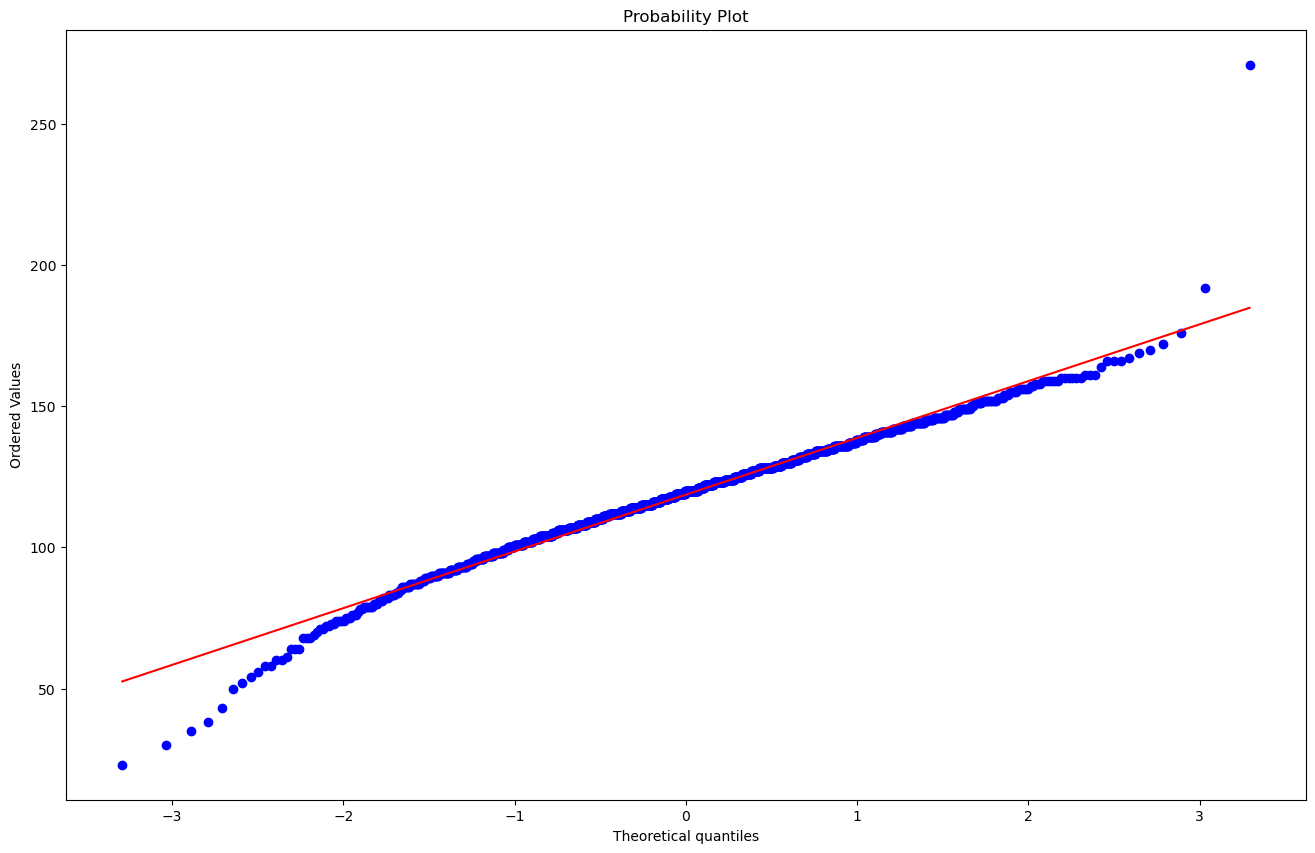

The Q-Q plot depicting baby weight displays a normal distribution closely aligned to the ideal normal disribution.
Using the plotted ideal normal distribution as the reference point, we can see that the actual distribution closely matches it.


In [8]:
#Plotting a Q-Q plot of baby weight
plt.figure(figsize= (16,10))
stats.probplot(babywt["bwght"], dist="norm", plot=plt)
plt.show()
print("The Q-Q plot depicting baby weight displays a normal distribution closely aligned to the ideal normal disribution.\nUsing the plotted ideal normal distribution as the reference point, we can see that the actual distribution closely matches it.")

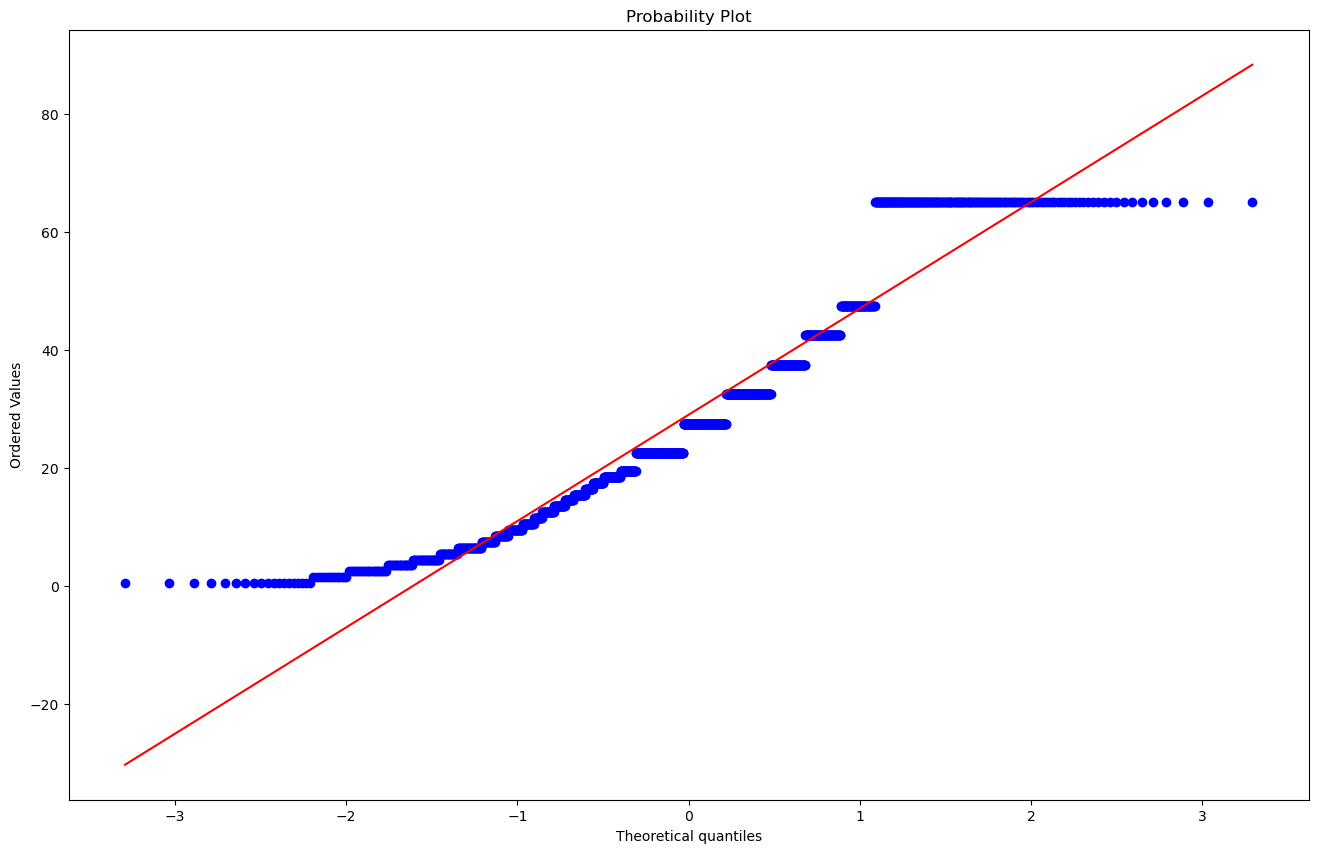

The Q-Q plot for family income does not closely follow the line representing the ideal normal distribution.
Using the ideal normal distribution as the reference point, we can observe that there is a major variance in the distribution of the data and it does not assume the shape of a normal distribution.


In [9]:
#Plotting a Q-Q plot of family income
plt.figure(figsize= (16,10))
stats.probplot(babywt["faminc"], dist="norm", plot=plt)
plt.show()
print("The Q-Q plot for family income does not closely follow the line representing the ideal normal distribution.\nUsing the ideal normal distribution as the reference point, we can observe that there is a major variance in the distribution of the data and it does not assume the shape of a normal distribution.")

In [10]:
#At present cigs is not a discrete variable and thus conditioning on the basis of a continous variable will not be clear. 
#Thus we need to define a new boolean variable that will return true or false based on whether or not mothers were smokers
babywt["smoker"]= babywt["cigs"] > 0 

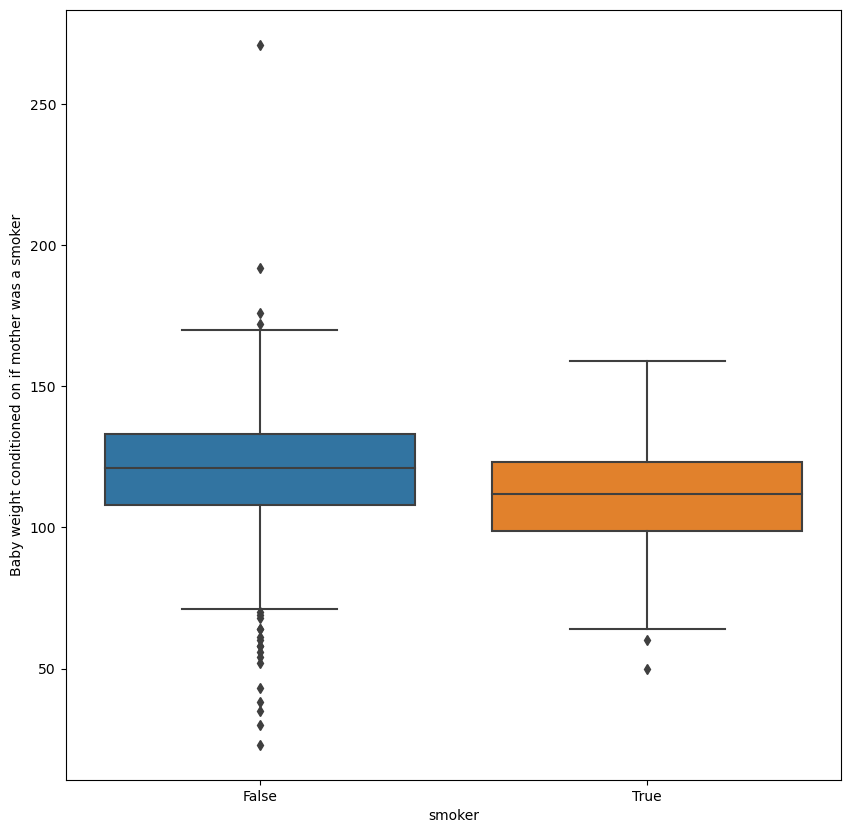

The median baby weight for babies whose mothers did not smoke during pregnancy is noticeably higher than for the other category. While there is not a difference approaching statistical significance levels, it still remains an important observation regarding the data.
One additional phenomenon is the presence of tails at both ends for the 'False' option, while the 'True' option appears to be more uniformly distributed.
This could indicate that while the effect of the activity was not statistically significant, there is a certain uniformity in its impact.


In [11]:
#Plotting a boxplot representation of mothers who were smokers
plt.figure(figsize=(10,10))
sns.boxplot(data=babywt, x="smoker", y="bwght")
plt.ylabel("Baby weight conditioned on if mother was a smoker")
plt.show()
print("The median baby weight for babies whose mothers did not smoke during pregnancy is noticeably higher than for the other category. While there is not a difference approaching statistical significance levels, it still remains an important observation regarding the data.\nOne additional phenomenon is the presence of tails at both ends for the 'False' option, while the 'True' option appears to be more uniformly distributed.\nThis could indicate that while the effect of the activity was not statistically significant, there is a certain uniformity in its impact.")

## Question 4

In [12]:
#Defining the regression function with baby weight and packs of cigarettes smoked by mother
reg= smf.ols("bwght~packs", data=babywt)
results =reg.fit()
coefficients = results.params
print(coefficients)
print("\nThis indicates a negative relationship between the number of packs smoked by a mother, and the weight of their baby. While we could preliminarily confirm this visually through the boxplots, this further supports that hypothesis. A slope of -10.27 roughly indicates that, according to this model, one pack smoked a day had the ability to cause upto 10 pounds in weight loss among the babies who were part of the study.\nAs always, regression models may not necessarily stand as substitute for more rigorous causal inference studies that demonstrate higher statistical significance, but preliminary observations can be made.")

Intercept    119.771900
packs        -10.275442
dtype: float64

This indicates a negative relationship between the number of packs smoked by a mother, and the weight of their baby. While we could preliminarily confirm this visually through the boxplots, this further supports that hypothesis. A slope of -10.27 roughly indicates that, according to this model, one pack smoked a day had the ability to cause upto 10 pounds in weight loss among the babies who were part of the study.
As always, regression models may not necessarily stand as substitute for more rigorous causal inference studies that demonstrate higher statistical significance, but preliminary observations can be made.


In [13]:
#Defining a new regression function to test at specific values of x or "packs"
intercept = coefficients["Intercept"]
slope = coefficients["packs"]
print("The predicted weight of a baby at birth when the number of packs smoked by the mother was 0 is", (intercept + slope*0))
print("\nThe predicted weight of a baby at birth when the number of packs smoked by the mother was 2 is", (intercept + slope*2))
print("\nThe intercept being 119.77 indicates that within the sample size of 1388 babies who were part of the study, babies unaffected by smoking habits of their mother tended to weigh roughly 119.77. This is not strictly an arithmetic mean, but rather an estimation based on the regression model, of instances where the y variable does not influence the x variable.\n(Here the x variable being baby weight and the y variable being number of packs smoked by the mother)")

The predicted weight of a baby at birth when the number of packs smoked by the mother was 0 is 119.77190040261036

The predicted weight of a baby at birth when the number of packs smoked by the mother was 2 is 99.22101663835795

The intercept being 119.77 indicates that within the sample size of 1388 babies who were part of the study, babies unaffected by smoking habits of their mother tended to weigh roughly 119.77. This is not strictly an arithmetic mean, but rather an estimation based on the regression model, of instances where the y variable does not influence the x variable.
(Here the x variable being baby weight and the y variable being number of packs smoked by the mother)


In [14]:
#Defining a variable to contain residuals
y_hat = results.fittedvalues
residuals = babywt["bwght"] - y_hat
#Displaying the output value of the sum of the residuals
print("The sum of the residuals of this regression model is", residuals.sum())
print("\nThis value is approximately equal to zero, thus verifying the properties of residuals of a regression model.")

The sum of the residuals of this regression model is 2.1401547201094218e-11

This value is approximately equal to zero, thus verifying the properties of residuals of a regression model.


In [15]:
#Defining a new variable within the bwght dataset, which is the fitted values of the regression model
babywt["predicted"] = y_hat

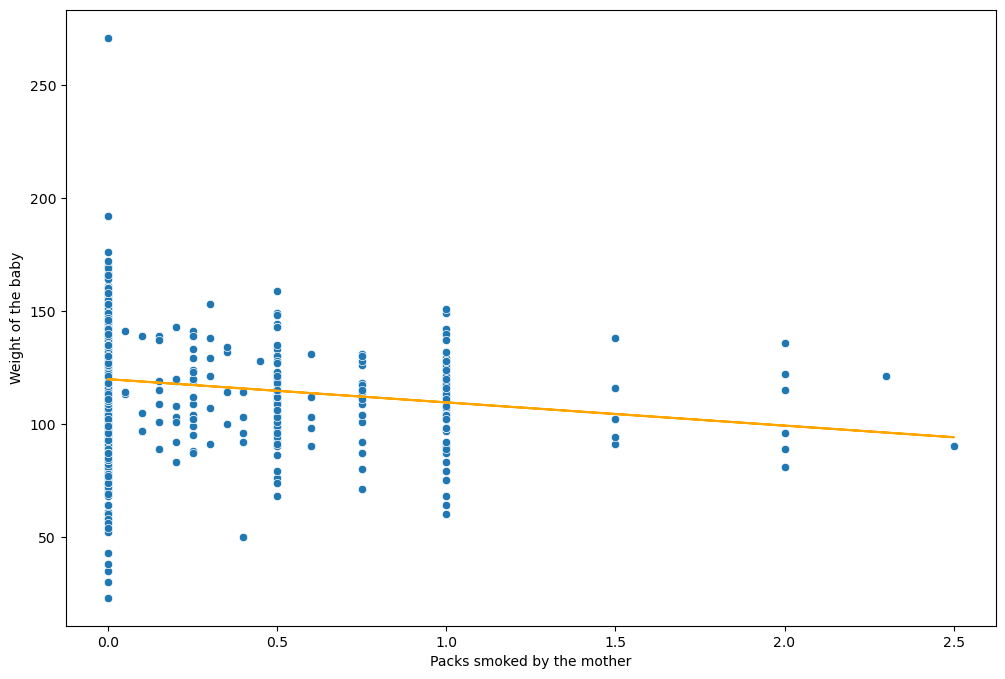

In [16]:
#Plotting a scatter plot comparing estimated values and actuals
plt.figure(figsize=(12,8))
sns.scatterplot(data = babywt, x = babywt["packs"], y =babywt["bwght"])
plt.plot(babywt["packs"], babywt["predicted"], color = "orange")
plt.xlabel("Packs smoked by the mother")
plt.ylabel("Weight of the baby")
plt.show()